In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(3,), name = "my_input")
features = layers.Dense(64, activation = "relu", name = "layer_1")(inputs)
outputs = layers.Dense(10, activation = "sigmoid", name = "final_layer")(features)

model = keras.Model(inputs = inputs, outputs = outputs)

In [3]:
inputs.shape

(None, 3)

In [4]:
inputs.dtype

'float32'

In [5]:
features.shape

(None, 64)

In [6]:
features.dtype

'float32'

In [7]:
outputs.shape

(None, 10)

In [8]:
outputs.dtype

'float32'

In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_layer (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Multi-input, Multi-output models for customer support tickets ranking by priority and then routing them to appropriate department

In [11]:
# Input: title of ticket (text), body of ticket (text), and tags added (categorical)
# encode text inputs as arrays of ones and zeros of size vocabulary_size

# Output: priority score of ticket (sigmoid), department (softmax over the set of departments)

In [12]:
vocabulary_size = 10000
num_tags = 100

num_departments = 4

In [13]:
# model inputs
title = keras.Input(shape=(vocabulary_size,), name = "title")
print(title.shape) # (None, 10000) where None = batch_size
text_body = keras.Input(shape=(vocabulary_size, ), name = "text_body")
tags = keras.Input(shape=(num_tags, ), name = "tags")
print(tags.shape) # (None, 100)

(None, 10000)
(None, 100)


In [14]:
features = layers.Concatenate()([title, text_body, tags])
print(features.shape) # (None, 20100)

features = layers.Dense(64, activation = "relu")(features)
print(features.shape) # (None, 64)

(None, 20100)
(None, 64)


In [15]:
# model outputs
priority = layers.Dense(1, activation = "sigmoid", name = "priority")(features)
print(priority.shape) # (None, 1)

department = layers.Dense(num_departments, activation = "softmax", name = "department") (features)
print(department.shape) # (None, 4)

(None, 1)
(None, 4)


In [16]:
model = keras.Model(inputs = [title, text_body, tags],
                    outputs = [priority, department])
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# training a multi-input, multi-output model

In [18]:
import numpy as np

num_samples = 1280

# dummy input data
title_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
print(title_data.shape) # (1280, 10000)

text_body_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
print(text_body_data.shape) # (1280, 10000)


tags_data = np.random.randint(0, 2, size = (num_samples, num_tags))
print(tags_data.shape) # (1280, 100)

# dummy target data
priority_data = np.random.random(size=(num_samples, 1))
print(priority_data.shape) # (1280, 1)

department_data = np.random.randint(0, 2, size = (num_samples, num_departments))
print(department_data.shape) # (1280, 4)


model.compile(optimizer = "rmsprop",
              loss = ["mean_squared_error", "categorical_crossentropy"],
              metrics = [["mean_absolute_error"], ["accuracy"]])

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data], epochs = 1)

model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])
print(priority_preds.shape) # (1280, 1)

print(department_preds.shape) # (1280, 4)

(1280, 10000)
(1280, 10000)
(1280, 100)
(1280, 1)
(1280, 4)
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - department_accuracy: 0.2942 - department_loss: 56.5821 - loss: 56.8666 - priority_loss: 0.2846 - priority_mean_absolute_error: 0.4457
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - department_accuracy: 0.5697 - department_loss: 39.8050 - loss: 40.1624 - priority_loss: 0.3574 - priority_mean_absolute_error: 0.5216
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(1280, 1)
(1280, 4)


In [19]:
print(priority_preds[0])

[1.]


In [20]:
print(department_preds[0])

[9.9999994e-01 5.7383034e-19 2.6618737e-08 7.0808688e-09]


In [21]:
print(np.argmax(department_preds[0]))

0


In [22]:
# training a model by providing dicts of input and target arrays

model.compile(optimizer = "rmsprop",
              loss = {"priority": "mean_squared_error",
                      "department": "categorical_crossentropy"},
              metrics = {"priority": ["mean_absolute_error"],
                         "department": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data}, epochs = 1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})

priority_preds, department_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - department_accuracy: 0.2714 - department_loss: 35.6253 - loss: 35.9857 - priority_loss: 0.3604 - priority_mean_absolute_error: 0.5263
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - department_accuracy: 0.3009 - department_loss: 19.8571 - loss: 20.2146 - priority_loss: 0.3574 - priority_mean_absolute_error: 0.5216
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [23]:
print(priority_preds[0])

[1.]


In [24]:
print(department_preds[0])

[1.1680992e-01 8.8293624e-01 3.2824604e-14 2.5390383e-04]


In [25]:
print(np.argmax(department_preds[0]))

1


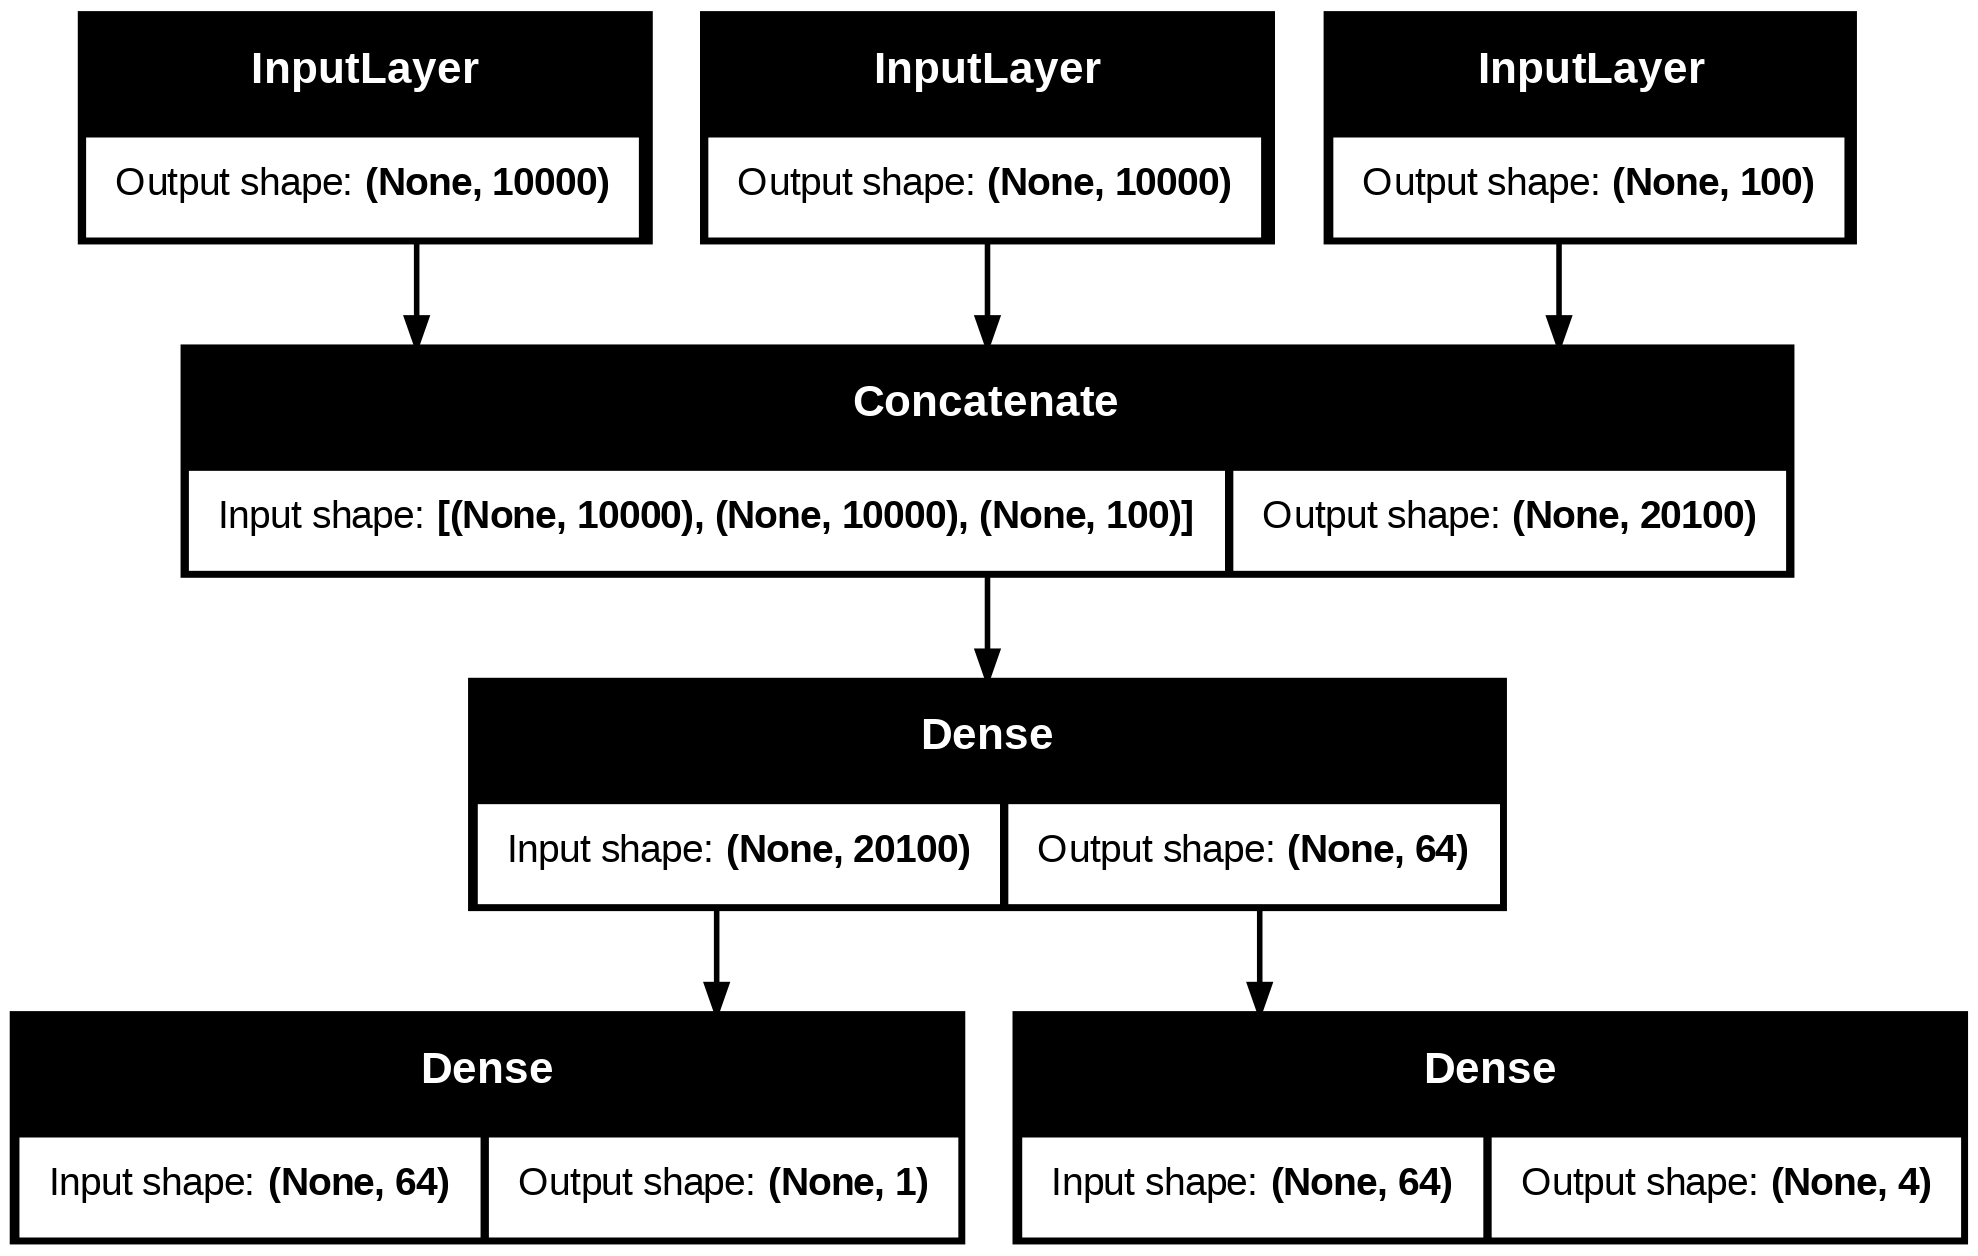

In [27]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes = True)

In [28]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]